# Exploratory Data Analysis Notebook

# Importing Packages

In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') # to suppress some matplotlib deprecation warnings
import os
import ast
import math

from simplification.cutil import simplify_coords

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.utils import shuffle

sns.set(style="darkgrid")


# Exploring Kaggle Dataset

## Raw Drawings

In [3]:
tr_raw_panda = pd.read_csv('../animals/train_raw/panda.csv')
tr_raw_panda.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[461, 450, 441, 431, 418, 401, 384, 368, 353...",5453565080371200,True,2017-03-13 16:53:48.790980,panda
1,BR,"[[[620, 615, 609, 604, 599, 592, 585, 578, 572...",5965556941324288,False,2017-03-09 16:19:44.633780,panda
2,BR,"[[[781, 759, 735, 707, 679, 646, 609, 571, 535...",6307234680143872,True,2017-01-26 00:21:17.363700,panda
3,US,"[[[417, 397, 384, 369, 348, 324, 301, 278, 255...",4625715938983936,True,2017-03-23 17:55:31.427700,panda
4,US,"[[[640, 634, 629, 624, 619, 612, 604, 595, 590...",5116330174840832,True,2017-01-26 16:13:48.454190,panda


In [4]:
tr_raw_panda.shape

(113613, 6)

In [5]:
tr_raw_panda.drawing[0]

'[[[461, 450, 441, 431, 418, 401, 384, 368, 353, 343, 335, 330, 328, 328, 328, 335, 343, 351, 364, 377, 391, 403, 417, 429, 445, 459, 472, 486, 500, 511, 522, 532, 538, 543, 545, 546, 546, 546, 541, 534, 527, 520, 511, 504, 495, 486, 480, 475, 470, 466], [165, 164, 164, 164, 166, 172, 181, 193, 206, 219, 233, 245, 260, 275, 288, 302, 314, 326, 338, 349, 360, 365, 370, 372, 372, 372, 367, 358, 346, 334, 322, 309, 298, 285, 274, 262, 249, 236, 223, 210, 198, 187, 179, 173, 167, 163, 160, 158, 157, 157], [0, 19, 36, 52, 68, 85, 101, 119, 136, 153, 173, 187, 203, 220, 236, 253, 270, 286, 303, 321, 334, 350, 367, 383, 400, 419, 436, 453, 470, 486, 503, 520, 537, 553, 570, 586, 603, 620, 637, 653, 673, 686, 704, 720, 737, 752, 769, 786, 803, 831]], [[503, 501, 501, 501, 504, 507, 512, 520, 526, 533, 541, 548, 556, 563, 570, 575, 581, 587, 592, 596, 599, 601, 602, 604, 604, 604, 604, 602, 598, 591, 584, 574, 564, 552, 541, 529, 522, 515, 511, 508, 506, 504], [164, 157, 151, 143, 135, 128, 123

In [6]:
len(tr_raw_panda.drawing[0])

5567

In [7]:
tr_raw_panda.drawing[1]

'[[[620, 615, 609, 604, 599, 592, 585, 578, 572, 567, 561, 555, 551, 548, 545, 544, 542, 542, 541, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 543, 549, 555, 560, 566, 571, 576, 582, 588, 598, 607, 620, 626, 633, 639, 647, 654, 661, 666, 676, 683, 691, 696, 703, 710, 719, 724, 730, 735, 740, 745, 750, 755, 756, 758, 759, 761, 762, 764, 765, 766, 766, 765, 765, 764, 762, 762, 761, 759, 758, 756, 754, 750, 747, 742, 733, 720, 707, 700, 695, 690, 685, 680, 673, 668, 663, 657, 651, 646, 641, 636, 631, 631], [175, 175, 176, 177, 179, 183, 187, 192, 197, 200, 205, 211, 217, 222, 228, 233, 238, 243, 249, 254, 259, 265, 270, 276, 281, 286, 292, 298, 303, 309, 315, 320, 326, 331, 336, 336, 336, 336, 336, 336, 336, 336, 338, 338, 339, 340, 340, 341, 341, 342, 344, 344, 343, 342, 341, 341, 341, 341, 341, 341, 341, 342, 343, 340, 339, 337, 335, 328, 322, 315, 309, 303, 298, 291, 286, 279, 274, 268, 261, 255, 248, 243, 238, 233, 227, 221, 214, 209, 207, 204, 198, 193,

In [8]:
len(tr_raw_panda.drawing[1])

3620

## Simplified Drawings

In [9]:
tr_simp_panda = pd.read_csv('../animals/train_simplified/panda.csv')
tr_simp_panda.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[132, 106, 81, 66, 40, 20, 18, 37, 60, 72, 1...",5453565080371200,True,2017-03-13 16:53:48.790980,panda
1,BR,"[[[90, 72, 50, 17, 6, 0, 0, 4, 48, 136, 161, 2...",5965556941324288,False,2017-03-09 16:19:44.633780,panda
2,BR,"[[[185, 148, 133, 116, 97, 61, 34, 34, 45, 57,...",6307234680143872,True,2017-01-26 00:21:17.363700,panda
3,US,"[[[149, 122, 97, 72, 59, 35, 26, 18, 17, 21, 2...",4625715938983936,True,2017-03-23 17:55:31.427700,panda
4,US,"[[[110, 63, 45, 30, 9, 1, 1, 15, 30, 59, 94, 1...",5116330174840832,True,2017-01-26 16:13:48.454190,panda


In [10]:
tr_simp_turtle = pd.read_csv('../animals/train_simplified/sea turtle.csv')
tr_simp_turtle.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,BR,"[[[165, 123, 107, 87, 78, 74, 75, 91, 115, 155...",6355133241753600,True,2017-03-22 22:54:54.811920,sea turtle
1,US,"[[[91, 110, 130, 147, 184, 203, 228, 249, 246,...",5752895599280128,True,2017-01-26 20:39:26.894950,sea turtle
2,PH,"[[[32, 31, 35, 56, 117, 175, 182, 194, 196, 18...",5370008991432704,True,2017-03-10 09:35:48.968480,sea turtle
3,AU,"[[[176, 171, 154, 128, 106, 67, 51, 26, 21, 20...",6135351108173824,True,2017-03-29 12:49:48.229370,sea turtle
4,CA,"[[[101, 93, 68, 44, 37, 32, 33, 44, 82, 139, 1...",5027717747572736,True,2017-03-07 11:57:37.051620,sea turtle


In [11]:
tr_simp_turtle['word'] = tr_simp_turtle['word'].replace(' ', '_', regex=True)
tr_simp_turtle.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,BR,"[[[165, 123, 107, 87, 78, 74, 75, 91, 115, 155...",6355133241753600,True,2017-03-22 22:54:54.811920,sea_turtle
1,US,"[[[91, 110, 130, 147, 184, 203, 228, 249, 246,...",5752895599280128,True,2017-01-26 20:39:26.894950,sea_turtle
2,PH,"[[[32, 31, 35, 56, 117, 175, 182, 194, 196, 18...",5370008991432704,True,2017-03-10 09:35:48.968480,sea_turtle
3,AU,"[[[176, 171, 154, 128, 106, 67, 51, 26, 21, 20...",6135351108173824,True,2017-03-29 12:49:48.229370,sea_turtle
4,CA,"[[[101, 93, 68, 44, 37, 32, 33, 44, 82, 139, 1...",5027717747572736,True,2017-03-07 11:57:37.051620,sea_turtle


In [12]:
tr_simp_turtle.drawing[0]

'[[[165, 123, 107, 87, 78, 74, 75, 91, 115, 155, 203, 215, 238, 241, 231, 207, 154, 117], [4, 3, 8, 26, 46, 66, 81, 95, 104, 108, 108, 104, 76, 40, 24, 12, 0, 3]], [[81, 23, 18, 7, 0, 13, 36, 63, 72], [55, 52, 53, 64, 87, 93, 92, 81, 71]], [[91, 73, 69, 75, 84, 105], [89, 104, 119, 121, 120, 90]], [[189, 205, 229, 236, 237, 228, 212], [101, 114, 123, 116, 108, 103, 102]], [[241, 255], [52, 45]]]'

In [13]:
len(tr_simp_turtle.drawing[0])

397

In [14]:
tr_simp_turtle.drawing[1]

'[[[91, 110, 130, 147, 184, 203, 228, 249, 246, 208, 185, 110, 81], [72, 46, 29, 21, 13, 16, 33, 64, 70, 84, 88, 89, 78]], [[237, 235, 242, 250, 255], [76, 80, 93, 95, 92]], [[250, 254, 255], [66, 77, 91]], [[252, 232, 186, 116, 97, 87, 77], [98, 106, 117, 120, 116, 109, 82]], [[90, 94, 85], [87, 105, 107]], [[83, 41, 5, 0, 11, 25, 59, 82, 97], [82, 111, 154, 165, 168, 168, 152, 128, 95]], [[77, 65, 44, 26, 33, 54, 73, 90, 105], [84, 77, 52, 1, 1, 8, 21, 38, 62]]]'

In [15]:
len(tr_simp_turtle.drawing[1])

467

# Testing Files

In [18]:
df = pd.read_csv('../data/sample_submission.csv')
df.head()

,key_id,word
0,9000003627287624,The_Eiffel_Tower airplane donut
1,9000010688666847,The_Eiffel_Tower airplane donut
2,9000023642890129,The_Eiffel_Tower airplane donut
3,9000038588854897,The_Eiffel_Tower airplane donut
4,9000052667981386,The_Eiffel_Tower airplane donut


In [19]:
df.shape

(112199, 2)

In [20]:
df2 = pd.read_csv('../data/test_raw.csv')
df2.head()

,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[537.8900146484375, 538.9500122070312, 538.9..."
1,9000010688666847,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840..."
2,9000023642890129,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238..."
3,9000038588854897,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483..."
4,9000052667981386,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759..."


In [21]:
df2.shape

(112199, 3)

In [22]:
df3 = pd.read_csv('../data/test_simplified.csv')
df3.head()

,key_id,countrycode,drawing
0,9000003627287624,DE,"[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,UA,"[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,BG,"[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,US,"[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,AR,"[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


In [23]:
df3.shape

(112199, 3)

In [24]:
df_total = pd.merge(df, df2, on='key_id')
df_total.head()

,key_id,word,countrycode,drawing
0,9000003627287624,The_Eiffel_Tower airplane donut,DE,"[[[537.8900146484375, 538.9500122070312, 538.9..."
1,9000010688666847,The_Eiffel_Tower airplane donut,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840..."
2,9000023642890129,The_Eiffel_Tower airplane donut,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238..."
3,9000038588854897,The_Eiffel_Tower airplane donut,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483..."
4,9000052667981386,The_Eiffel_Tower airplane donut,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759..."


In [25]:
len(df_total)

112199

In [26]:
df_merge = pd.merge(df_total, df3, on=['key_id', 'countrycode'])
df_merge.head()

,key_id,word,countrycode,drawing_x,drawing_y
0,9000003627287624,The_Eiffel_Tower airplane donut,DE,"[[[537.8900146484375, 538.9500122070312, 538.9...","[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,The_Eiffel_Tower airplane donut,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840...","[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,The_Eiffel_Tower airplane donut,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238...","[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,The_Eiffel_Tower airplane donut,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483...","[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,The_Eiffel_Tower airplane donut,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759...","[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


In [27]:
df_merge.columns = ['key_id', 'word', 'countrycode', 'drawing_raw', 'drawing_simplified']
df_merge.head()

,key_id,word,countrycode,drawing_raw,drawing_simplified
0,9000003627287624,The_Eiffel_Tower airplane donut,DE,"[[[537.8900146484375, 538.9500122070312, 538.9...","[[[17, 18, 20, 25, 137, 174, 242, 249, 251, 25..."
1,9000010688666847,The_Eiffel_Tower airplane donut,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840...","[[[174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 16..."
2,9000023642890129,The_Eiffel_Tower airplane donut,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238...","[[[0, 12, 14, 17, 16, 24, 55, 57, 60, 79, 82, ..."
3,9000038588854897,The_Eiffel_Tower airplane donut,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483...","[[[0, 9, 23, 40, 54, 60, 81, 105, 123, 167, 20..."
4,9000052667981386,The_Eiffel_Tower airplane donut,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759...","[[[87, 82, 71, 63, 66, 92, 96, 95], [220, 218,..."


In [37]:
df_merge.to_csv('../data/df_merge.csv')

In [28]:
animals = ['ant', 'bat', 'bear', 'bee', 'butterfly', 'camel', 'cat', 'cow', 'crab', 'crocodile', 'dog', 'dolphin', 'dragon', 'duck', 'elephant', 'flamingo', 'frog', 'giraffe', 'hedgehog', 'horse', 'kangaroo', 'lion', 'lobster', 'monkey', 'mosquito', 'mouse', 'octopus', 'owl', 'panda', 'parrot', 'penguin', 'pig', 'rabbit', 'raccoon', 'rhinoceros', 'scorpion', 'sea_turtle', 'shark', 'sheep', 'snail', 'snake', 'spider', 'squirrel', 'swan', 'tiger', 'whale', 'zebra']

In [29]:
len(animals)

47

# Visualizing Simplified vs. Raw Drawings

In [30]:
test_raw = pd.read_csv('../data/test_raw.csv', index_col='key_id')
first_ten_ids = test_raw.iloc[:10].index
raw_images = [ast.literal_eval(lst) for lst in test_raw.loc[first_ten_ids, 'drawing'].values]

In [31]:
test_raw.head()

,countrycode,drawing
key_id,,
9000003627287624,DE,"[[[537.8900146484375, 538.9500122070312, 538.9..."
9000010688666847,UA,"[[[883, 878, 873, 868, 862, 857, 852, 846, 840..."
9000023642890129,BG,"[[[225, 228, 229, 232, 232, 233, 235, 235, 238..."
9000038588854897,US,"[[[453, 458, 465, 467, 471, 474, 477, 479, 483..."
9000052667981386,AR,"[[[793, 788, 783, 778, 772, 768, 765, 761, 759..."


In [32]:
def resample(x, y, spacing=1.0):
    output = []
    n = len(x)
    px = x[0]
    py = y[0]
    cumlen = 0
    pcumlen = 0
    offset = 0
    for i in range(1, n):
        cx = x[i]
        cy = y[i]
        dx = cx - px
        dy = cy - py
        curlen = math.sqrt(dx*dx + dy*dy)
        cumlen += curlen
        while offset < cumlen:
            t = (offset - pcumlen) / curlen
            invt = 1 - t
            tx = px * invt + cx * t
            ty = py * invt + cy * t
            output.append((tx, ty))
            offset += spacing
        pcumlen = cumlen
        px = cx
        py = cy
    output.append((x[-1], y[-1]))
    return output
  
def normalize_resample_simplify(strokes, epsilon=1.0, resample_spacing=1.0):
    if len(strokes) == 0:
        raise ValueError('empty image')

    # find min and max
    amin = None
    amax = None
    for x, y, _ in strokes:
        cur_min = [np.min(x), np.min(y)]
        cur_max = [np.max(x), np.max(y)]
        amin = cur_min if amin is None else np.min([amin, cur_min], axis=0)
        amax = cur_max if amax is None else np.max([amax, cur_max], axis=0)

    # drop any drawings that are linear along one axis
    arange = np.array(amax) - np.array(amin)
    if np.min(arange) == 0:
        raise ValueError('bad range of values')

    arange = np.max(arange)
    output = []
    for x, y, _ in strokes:
        xy = np.array([x, y], dtype=float).T
        xy -= amin
        xy *= 255.
        xy /= arange
        resampled = resample(xy[:, 0], xy[:, 1], resample_spacing)
        simplified = simplify_coords(resampled, epsilon)
        xy = np.around(simplified).astype(np.uint8)
        output.append(xy.T.tolist())

    return output

In [33]:
simplified_drawings = []
for drawing in raw_images:
    simplified_drawing = normalize_resample_simplify(drawing)
    simplified_drawings.append(simplified_drawing)

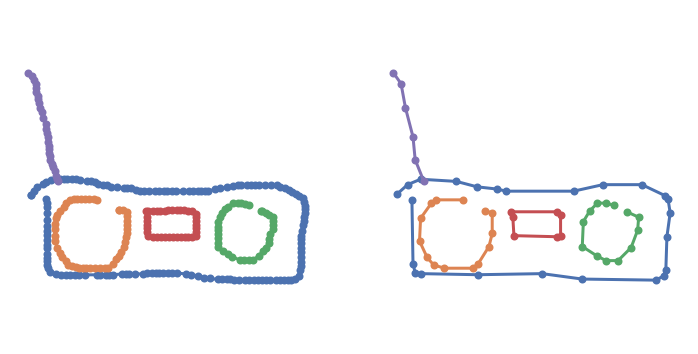

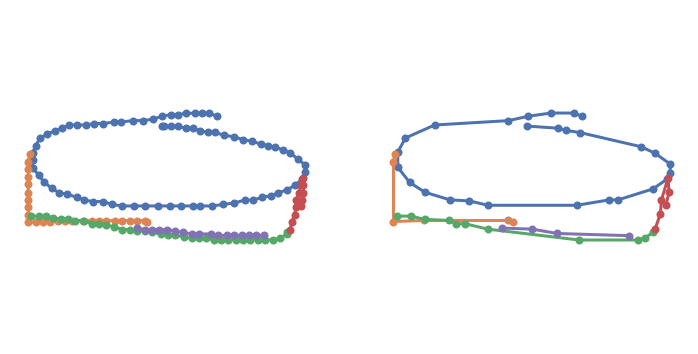

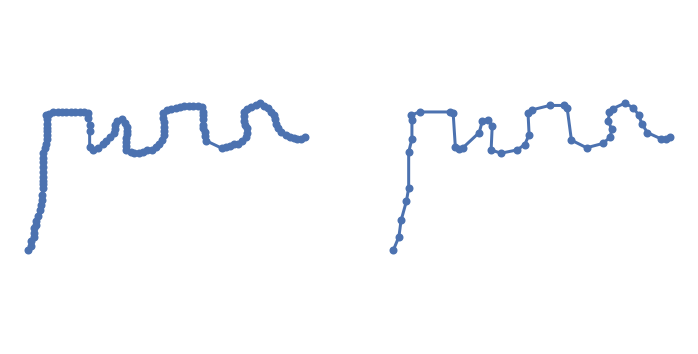

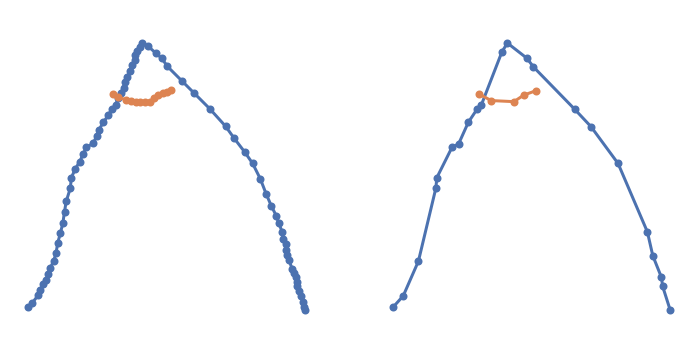

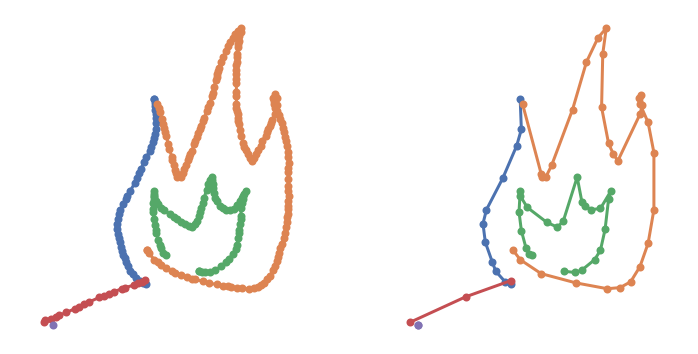

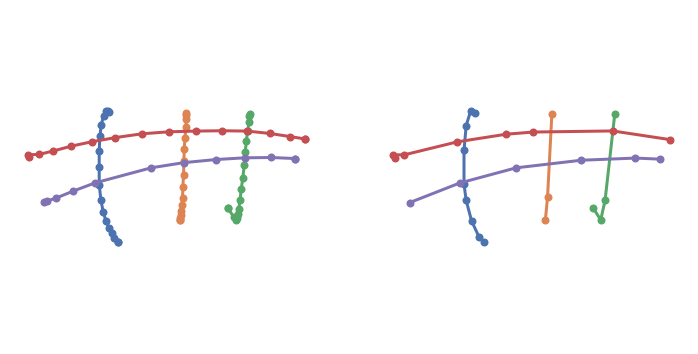

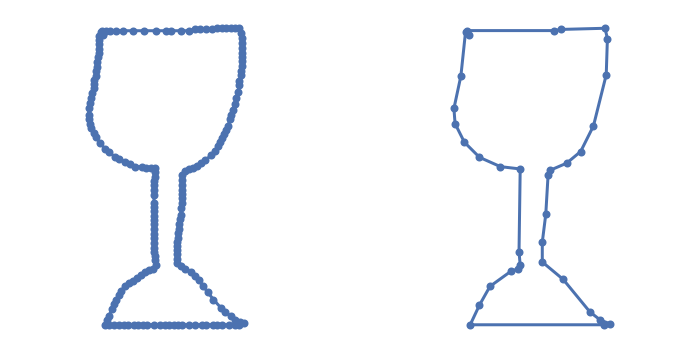

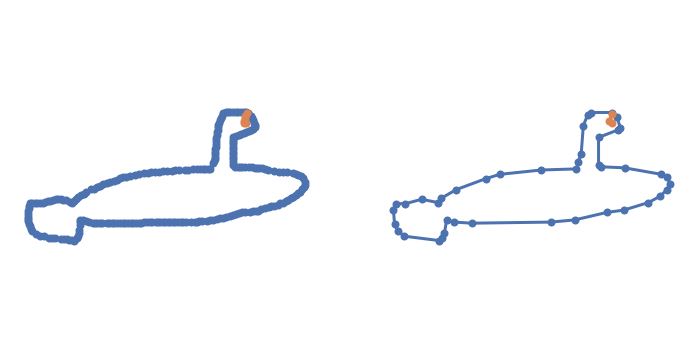

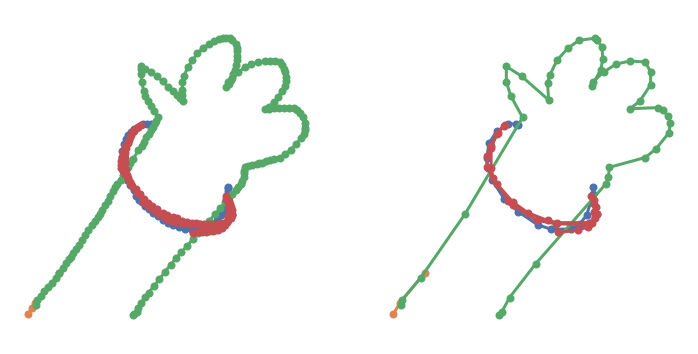

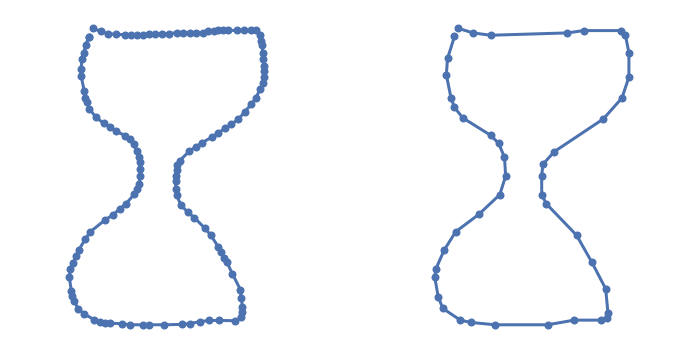

In [34]:
for index, raw_drawing in enumerate(raw_images, 0):
    
    plt.figure(figsize=(6,3))
    
    for x,y,t in raw_drawing:
        plt.subplot(1,2,1)
        plt.plot(x, y, marker='.')
        plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')

    for x,y in simplified_drawings[index]:
        plt.subplot(1,2,2)
        plt.plot(x, y, marker='.')
        plt.axis('off')

    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()  

In [59]:
data = pd.DataFrame()
files_directory = os.listdir("../animals/train_simplified")
for file in files_directory:
    data = data.append(pd.read_csv('../animals/train_simplified/' + file, encoding = "ISO-8859-1"))

# Shuffle data
data = shuffle(data, random_state=42)

In [60]:
files_directory.remove('.DS_Store')
len(files_directory)

47

In [61]:
data.drop(columns='Unnamed: 0', inplace=True)
data.set_index('key_id')
data.head()

,countrycode,drawing,key_id,recognized,timestamp,word
120465,SE,"[[[26, 48, 65, 82, 84, 74, 52, 37, 9], [113, 1...",4.980304e+15,True,2017-01-24 18:53:27.058480,kangaroo
23469,IQ,"[[[237, 233, 228, 219, 216, 240, 246], [80, 78...",6.188777e+15,True,2017-03-05 18:34:53.316220,scorpion
45122,CZ,"[[[82, 75, 71, 71, 80, 94, 112, 137, 150, 159,...",6.044878e+15,True,2017-01-25 12:22:06.116780,monkey
60408,US,"[[[149, 122, 101, 90, 82, 81, 94, 117, 134, 14...",4.600624e+15,True,2017-03-11 02:44:39.205510,lobster
118714,US,"[[[61, 65, 76, 98, 136, 160, 175, 191, 195, 19...",5.826794e+15,True,2017-03-28 02:43:01.647940,crab


In [62]:
print('Train number of rows: ', data.shape[0])
print('Train number of columns: ', data.shape[1])
print('Train set features: %s' % data.columns.values)
print('Train number of label categories: %s' % len(files_directory))

Train number of rows:  6691419
Train number of columns:  6
Train set features: ['countrycode' 'drawing' 'key_id' 'recognized' 'timestamp' 'word']
Train number of label categories: 47


In [63]:
data.to_csv('../data/data.csv', index=False)

# Count by Category

In [40]:
count_gp = data.groupby(['word']).size().reset_index(name='count').sort_values('count', ascending=False)
top_10 = count_gp[:10]
bottom_10 = count_gp[count_gp.shape[0]-10:count_gp.shape[0]]

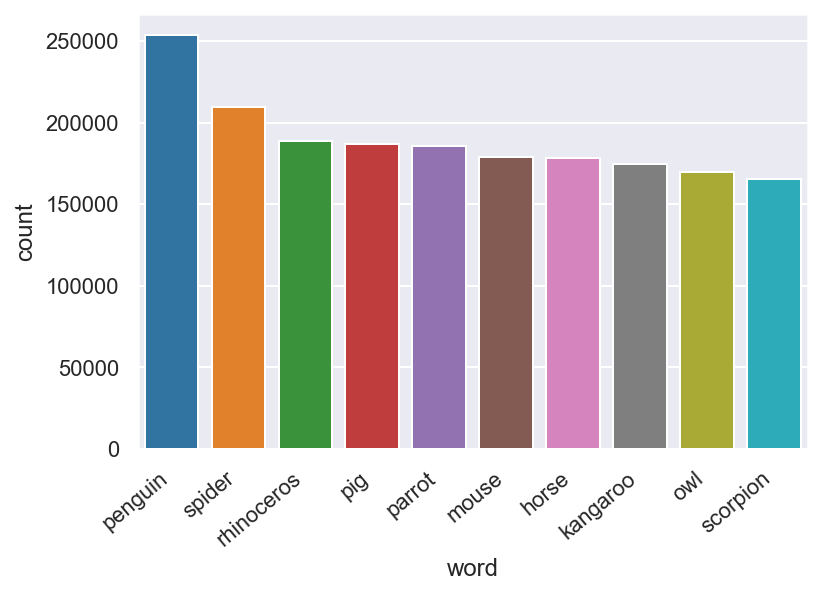

In [41]:
ax_t10 = sns.barplot(x="word", y="count", data=top_10, palette="tab10")
ax_t10.set_xticklabels(ax_t10.get_xticklabels(), rotation=40, ha="right")
plt.show()

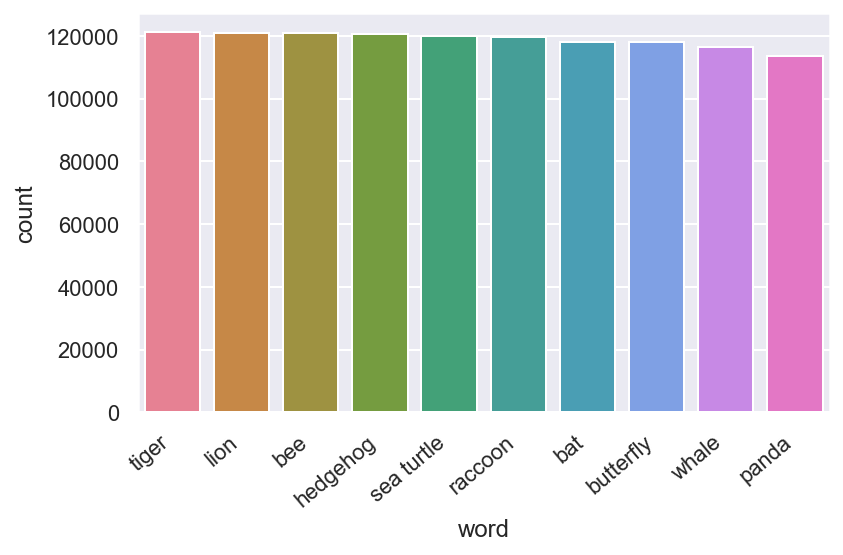

In [42]:
ax_b10 = sns.barplot(x="word", y="count", data=bottom_10, palette="husl")
ax_b10.set_xticklabels(ax_b10.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [43]:
count_gp


,word,count
30,penguin,253791
41,spider,209447
34,rhinoceros,188484
31,pig,186770
29,parrot,185530
25,mouse,178826
19,horse,178286
20,kangaroo,174470
27,owl,169632
35,scorpion,165689


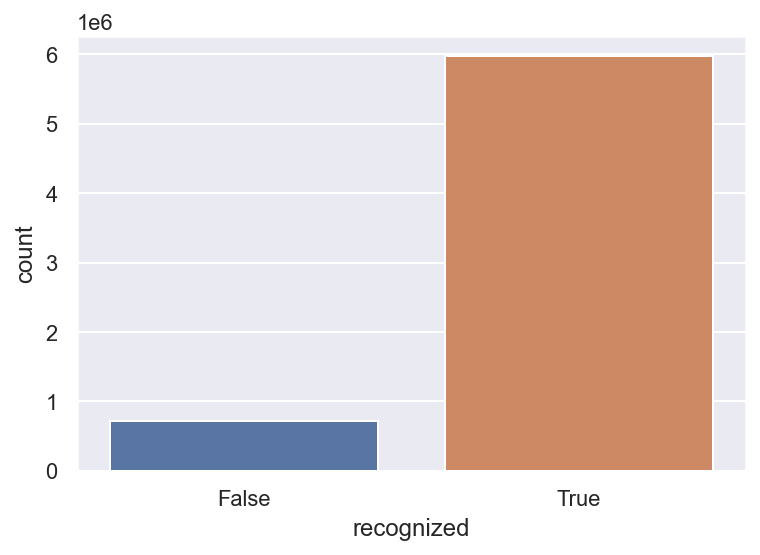

In [44]:
sns.countplot(x="recognized", data=train)
plt.show()


In [45]:
rec_gp = train.groupby(['word', 'recognized']).size().reset_index(name='count')
rec_true = rec_gp[(rec_gp['recognized'] == True)].rename(index=str, columns={"recognized": "recognized_true", "count": "count_true"})
rec_false = rec_gp[(rec_gp['recognized'] == False)].rename(index=str, columns={"recognized": "recognized_false", "count": "count_false"})
rec_gp = rec_true.set_index('word').join(rec_false.set_index('word'), on='word')
rec_gp

,recognized_true,count_true,recognized_false,count_false
word,,,,
ant,True,115718,False,8894
bat,True,96152,False,21962
bear,True,127671,False,7091
bee,True,110906,False,9984
butterfly,True,114549,False,3450
camel,True,115454,False,5945
cat,True,103031,False,20171
cow,True,101099,False,21984
crab,True,106466,False,20464


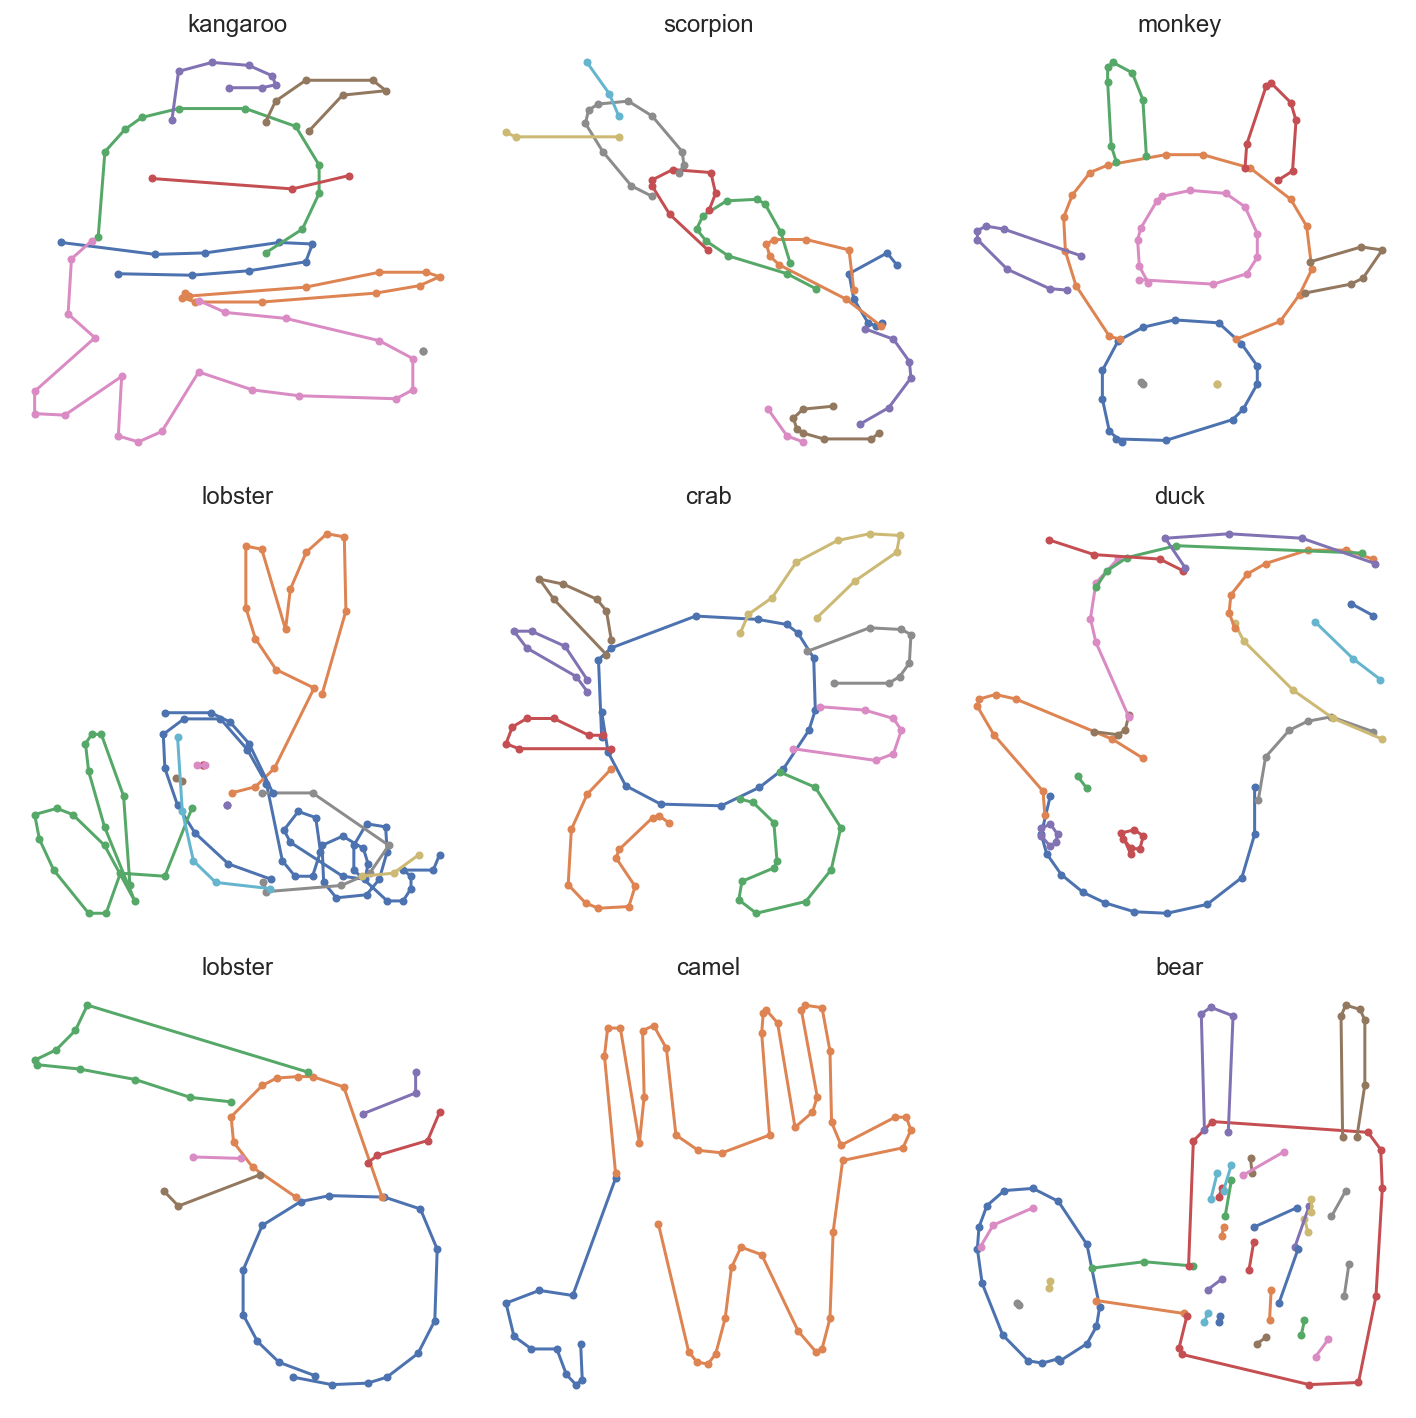

In [46]:
words = train['word'].tolist()
drawings = [ast.literal_eval(pts) for pts in train[:9]['drawing'].values]

plt.figure(figsize=(10, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(330 + (i+1))
    for x,y in drawing:
        plt.plot(x, y, marker='.')
        plt.tight_layout()
        plt.title(words[i]);
        plt.axis('off')

In [64]:
data['split'] = np.random.randn(data.shape[0], 1)

In [65]:
msk = np.random.rand(len(data)) <= 0.8

train = data[msk]
testing = data[~msk]

In [66]:
len(train)

5352868

In [67]:
len(testing)

1338551

In [68]:
train.head()

,countrycode,drawing,key_id,recognized,timestamp,word,split
45122,CZ,"[[[82, 75, 71, 71, 80, 94, 112, 137, 150, 159,...",6.044878e+15,True,2017-01-25 12:22:06.116780,monkey,-1.757218
60408,US,"[[[149, 122, 101, 90, 82, 81, 94, 117, 134, 14...",4.600624e+15,True,2017-03-11 02:44:39.205510,lobster,0.409245
118714,US,"[[[61, 65, 76, 98, 136, 160, 175, 191, 195, 19...",5.826794e+15,True,2017-03-28 02:43:01.647940,crab,-0.503643
82456,US,"[[[40, 35, 38, 46, 58, 70, 86, 104, 126, 145, ...",5.563455e+15,False,2017-03-08 15:38:39.946200,duck,-0.645110
79773,BR,"[[[117, 102, 93, 87, 87, 95, 111, 123, 146, 16...",4.799267e+15,True,2017-03-08 17:27:22.082230,lobster,-0.469199


In [73]:
train.to_csv('../data/train.csv', index=False)
testing.to_csv('../data/valid.csv', index=False)